# Import Library dan Upload Dataset

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns

In [2]:
%pip install --upgrade nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# code ini untuk menghilangkan warning message saat kita menjalankan code-code
import warnings
warnings.filterwarnings('ignore')

In [4]:
airline_data = pd.read_csv('Airline_Delay_Cause.csv')

 # Transforming for Quality

## Parsing Airport Variables

In [5]:
airline_data[['airport_city', 'airport_state', 'airport_name']] = airline_data['airport_name'].str.extract(r'(.+),\s([A-Z]{2}):\s(.+)')

# Tampilkan hasil
airline_data[['airport_city', 'airport_state', 'airport_name']].head()

,airport_city,airport_state,airport_name
0,Allentown/Bethlehem/Easton,PA,Lehigh Valley International
1,Albany,GA,Southwest Georgia Regional
2,Alexandria,LA,Alexandria International
3,Augusta,GA,Augusta Regional at Bush Field
4,Albany,NY,Albany International


In [6]:
airline_data[['airport_city']].value_counts()

airport_city         
Washington               2745
New York                 2326
Portland                 2303
Chicago                  1919
Houston                  1912
                         ... 
Fort Collins/Loveland       1
Macon                       1
Wendover                    1
Tokeen                      1
Youngstown/Warren           1
Name: count, Length: 376, dtype: int64

In [7]:
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
    'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'PR': 'Puerto Rico', 'VI': 'Virgin Islands', 'TT': 'Trust Territories'  # TT bisa diganti sesuai konteks
}

# Misal kolom kode negara bagian adalah 'airport_state'
airline_data['airport_state_full'] = airline_data['airport_state'].map(state_abbrev_to_name)

## Percentage Columns

In [8]:
airline_data["arr_del15_percentage"] = (airline_data["arr_del15"] / airline_data["arr_flights"]) * 100
airline_data["arr_diverted_percentage"] = (airline_data["arr_diverted"] / airline_data["arr_flights"]) * 100
airline_data["arr_cancelled_percentage"] = (airline_data["arr_cancelled"] / airline_data["arr_flights"]) * 100

In [9]:
airline_data["carrier_ct_percentage"] = (airline_data["carrier_ct"] / airline_data["arr_del15"]) * 100
airline_data["weather_ct_percentage"] = (airline_data["weather_ct"] / airline_data["arr_del15"]) * 100
airline_data["nas_ct_percentage"] = (airline_data["nas_ct"] / airline_data["arr_del15"]) * 100
airline_data["security_ct_percentage"] = (airline_data["security_ct"] / airline_data["arr_del15"]) * 100
airline_data["late_aircraft_ct_percentage"] = (airline_data["late_aircraft_ct"] / airline_data["arr_del15"]) * 100

In [10]:
airline_data["carrier_delay_percentage"] = (airline_data["carrier_delay"] / airline_data["arr_delay"]) * 100
airline_data["weather_delay_percentage"] = (airline_data["weather_delay"] / airline_data["arr_delay"]) * 100
airline_data["nas_delay_percentage"] = (airline_data["nas_delay"] / airline_data["arr_delay"]) * 100
airline_data["security_delay_percentage"] = (airline_data["security_delay"] / airline_data["arr_delay"]) * 100
airline_data["late_aircraft_delay_percentage"] = (airline_data["late_aircraft_delay"] / airline_data["arr_delay"]) * 100

## Reorder Columns

In [11]:
ordered_columns = [
    'year', 'month', 'carrier', 'carrier_name', 'airport',
    'airport_city', 'airport_state', 'airport_state_full', 'airport_name', 
    'arr_flights',
    'arr_del15', 'arr_del15_percentage',
    'arr_cancelled', 'arr_cancelled_percentage',
    'arr_diverted', 'arr_diverted_percentage',
    'carrier_ct', 'carrier_ct_percentage',
    'weather_ct', 'weather_ct_percentage',
    'nas_ct', 'nas_ct_percentage',
    'security_ct', 'security_ct_percentage',
    'late_aircraft_ct', 'late_aircraft_ct_percentage',
    'arr_delay',
    'carrier_delay', 'carrier_delay_percentage',
    'weather_delay', 'weather_delay_percentage',
    'nas_delay', 'nas_delay_percentage',
    'security_delay', 'security_delay_percentage',
    'late_aircraft_delay', 'late_aircraft_delay_percentage'
]

# Reorder the DataFrame columns
airline_data = airline_data[ordered_columns]



In [12]:
airline_data.head()

,year,month,carrier,carrier_name,airport,airport_city,airport_state,airport_state_full,airport_name,arr_flights,...,carrier_delay,carrier_delay_percentage,weather_delay,weather_delay_percentage,nas_delay,nas_delay_percentage,security_delay,security_delay_percentage,late_aircraft_delay,late_aircraft_delay_percentage
0,2023,8,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,PA,Pennsylvania,Lehigh Valley International,89.0,...,71.0,5.163636,761.0,55.345455,118.0,8.581818,0.0,0.0,425.0,30.909091
1,2023,8,9E,Endeavor Air Inc.,ABY,Albany,GA,Georgia,Southwest Georgia Regional,62.0,...,218.0,27.284105,1.0,0.125156,62.0,7.759700,0.0,0.0,518.0,64.831039
2,2023,8,9E,Endeavor Air Inc.,AEX,Alexandria,LA,Louisiana,Alexandria International,62.0,...,56.0,7.310705,188.0,24.543081,78.0,10.182768,0.0,0.0,444.0,57.963446
3,2023,8,9E,Endeavor Air Inc.,AGS,Augusta,GA,Georgia,Augusta Regional at Bush Field,66.0,...,471.0,33.715104,320.0,22.906228,388.0,27.773801,0.0,0.0,218.0,15.604868
4,2023,8,9E,Endeavor Air Inc.,ALB,Albany,NY,New York,Albany International,92.0,...,628.0,41.045752,0.0,0.000000,134.0,8.758170,0.0,0.0,768.0,50.196078


In [13]:
airline_data.to_csv('Airline_Delay_Cause_Data_Processing.csv', index=False)
print("New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!")

New CSV file 'Airline_Delay_Cause_Data_Processing.csv' saved successfully!


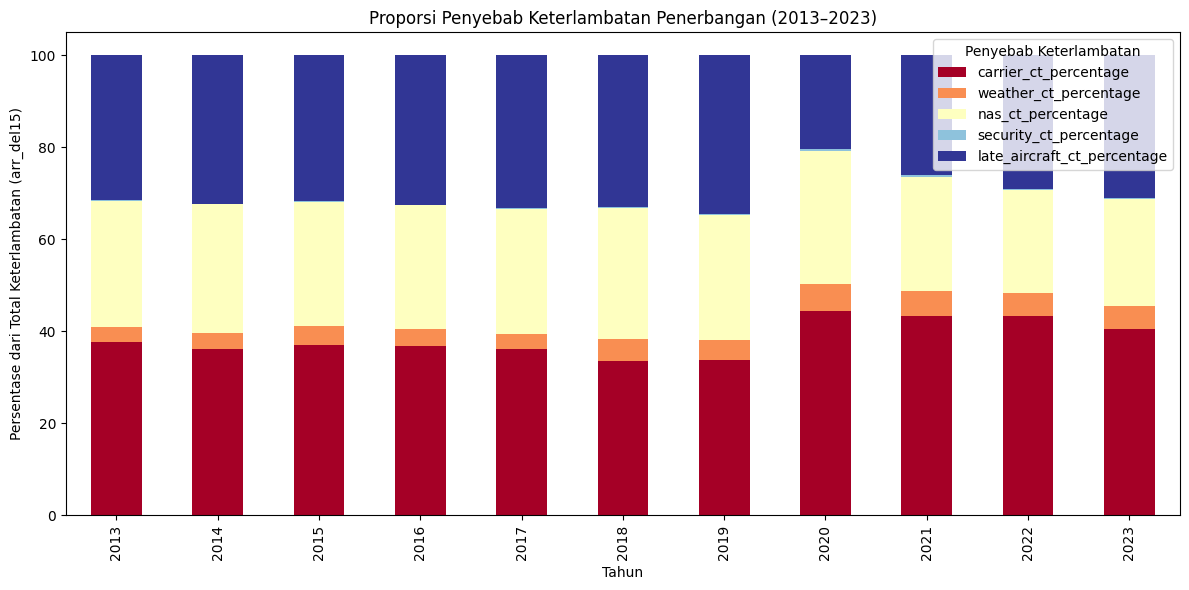

In [14]:
grouped = airline_data.groupby("year")[["carrier_ct_percentage", "weather_ct_percentage", 
                              "nas_ct_percentage", "security_ct_percentage", 
                              "late_aircraft_ct_percentage"]].mean()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlBu')
plt.title("Proporsi Penyebab Keterlambatan Penerbangan (2013–2023)")
plt.ylabel("Persentase dari Total Keterlambatan (arr_del15)")
plt.xlabel("Tahun")
plt.legend(title="Penyebab Keterlambatan")
plt.tight_layout()
plt.show()

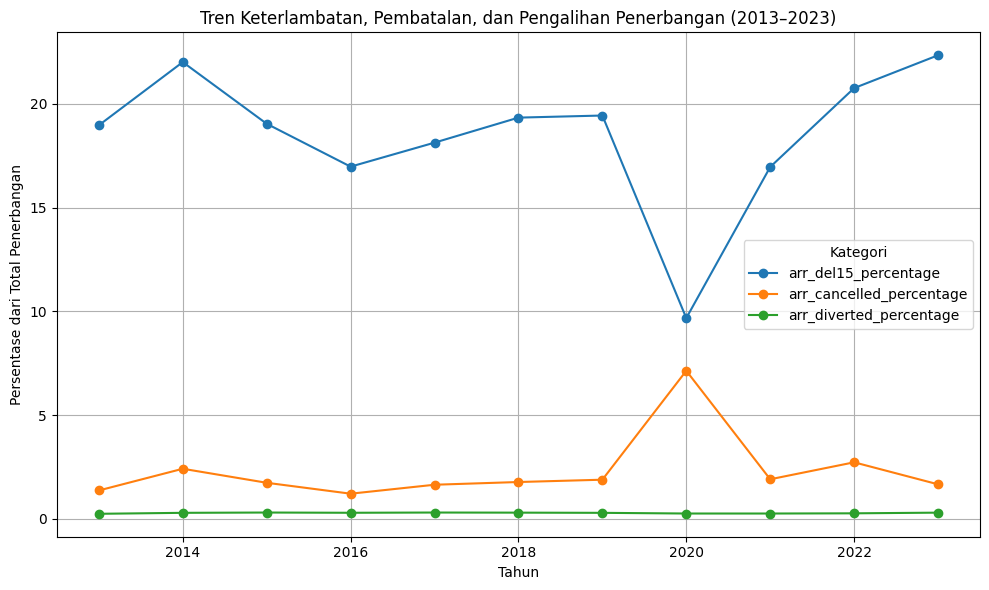

In [15]:
summary = airline_data.groupby("year")[["arr_del15_percentage", "arr_cancelled_percentage", "arr_diverted_percentage"]].mean()

summary.plot(figsize=(10, 6), marker='o')
plt.title("Tren Keterlambatan, Pembatalan, dan Pengalihan Penerbangan (2013–2023)")
plt.ylabel("Persentase dari Total Penerbangan")
plt.xlabel("Tahun")
plt.legend(title="Kategori")
plt.grid(True)
plt.tight_layout()
plt.show()

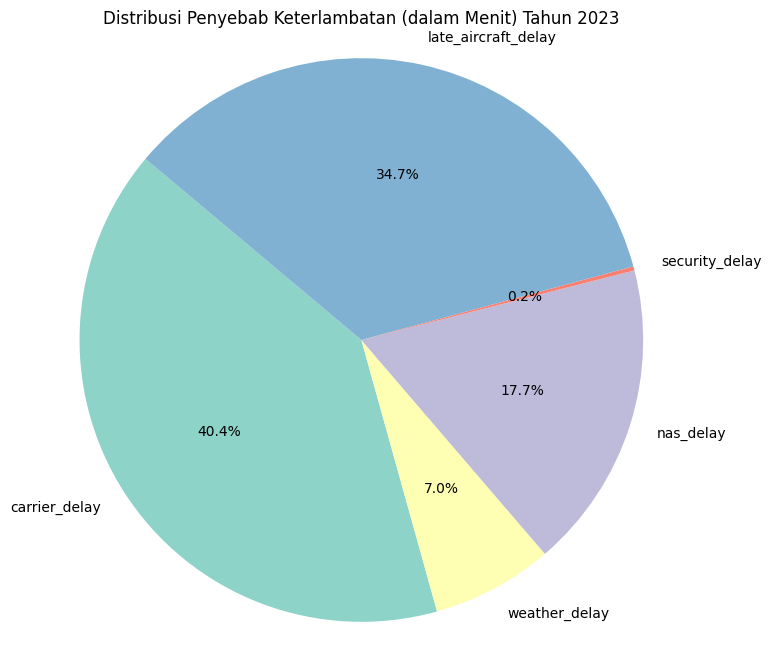

In [16]:
year_selected = 2023
df_year = airline_data[airline_data['year'] == year_selected]

mean_delay_distribution = df_year[["carrier_delay_percentage", "weather_delay_percentage",
                                   "nas_delay_percentage", "security_delay_percentage",
                                   "late_aircraft_delay_percentage"]].mean()

plt.figure(figsize=(8, 8))
plt.pie(mean_delay_distribution, labels=mean_delay_distribution.index.str.replace("_percentage", ""),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title(f"Distribusi Penyebab Keterlambatan (dalam Menit) Tahun {year_selected}")
plt.axis('equal')
plt.show()

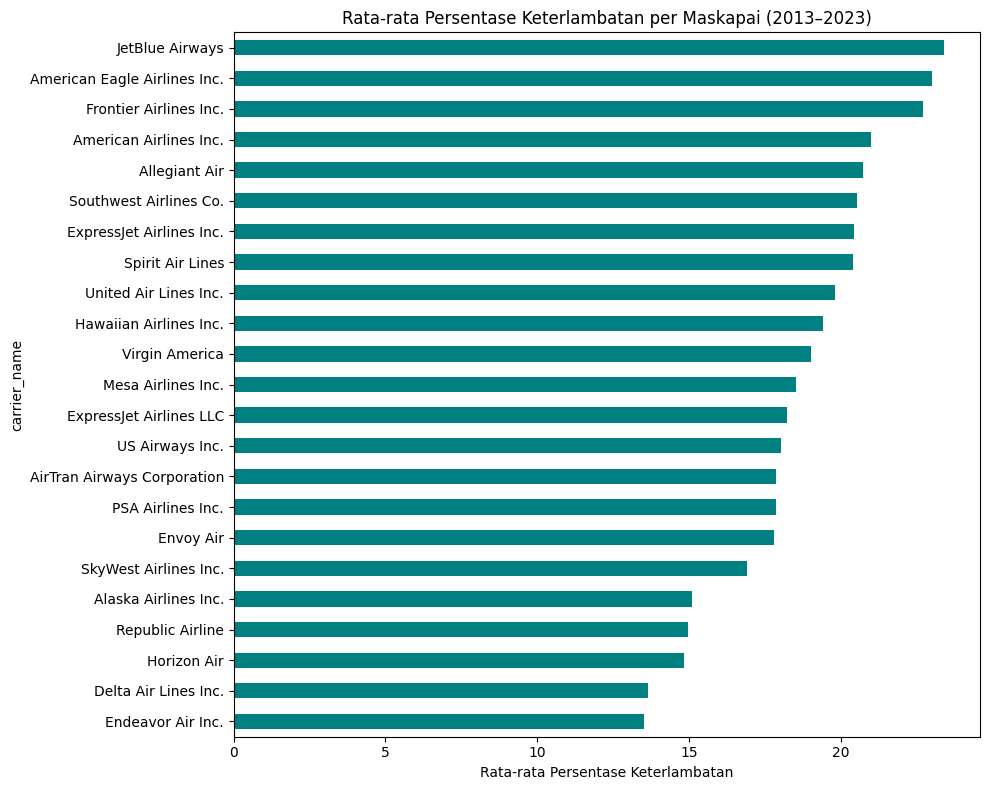

In [17]:
carrier_avg_delay = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values()

carrier_avg_delay.plot(kind='barh', figsize=(10, 8), color='teal')
plt.title('Rata-rata Persentase Keterlambatan per Maskapai (2013–2023)')
plt.xlabel('Rata-rata Persentase Keterlambatan')
plt.tight_layout()
plt.show()

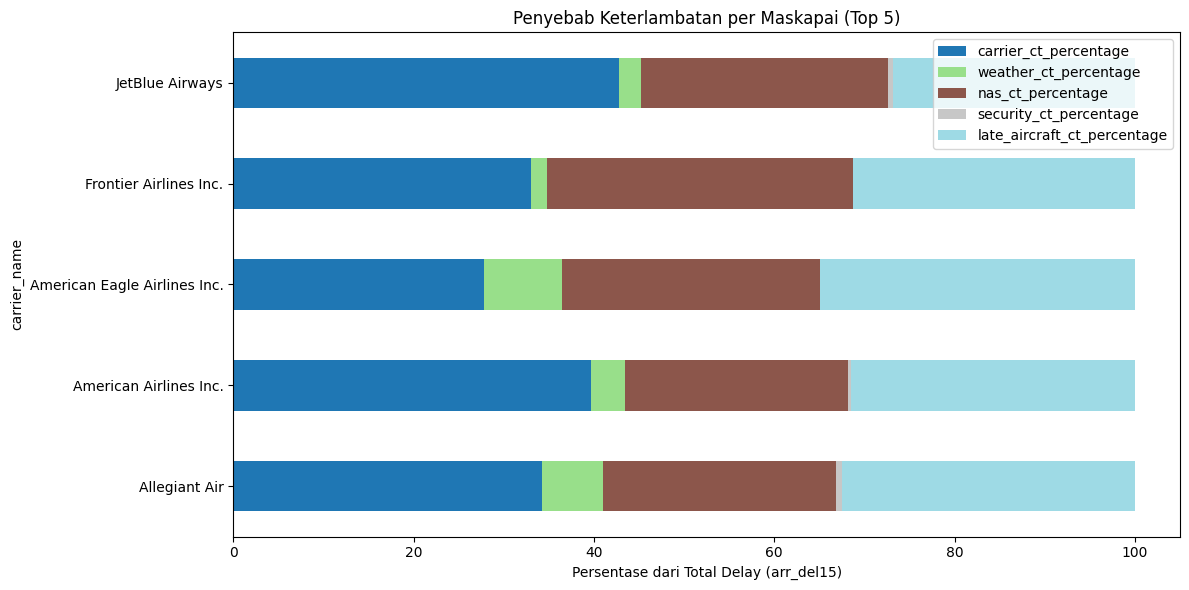

In [18]:
top_carriers = airline_data.groupby('carrier_name')['arr_del15_percentage'].mean().sort_values(ascending=False).head(5).index
df_top_carriers = airline_data[airline_data['carrier_name'].isin(top_carriers)]

carrier_stacked = df_top_carriers.groupby('carrier_name')[
    ['carrier_ct_percentage', 'weather_ct_percentage', 'nas_ct_percentage', 
     'security_ct_percentage', 'late_aircraft_ct_percentage']].mean()

carrier_stacked.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Penyebab Keterlambatan per Maskapai (Top 5)')
plt.xlabel('Persentase dari Total Delay (arr_del15)')
plt.tight_layout()
plt.show()

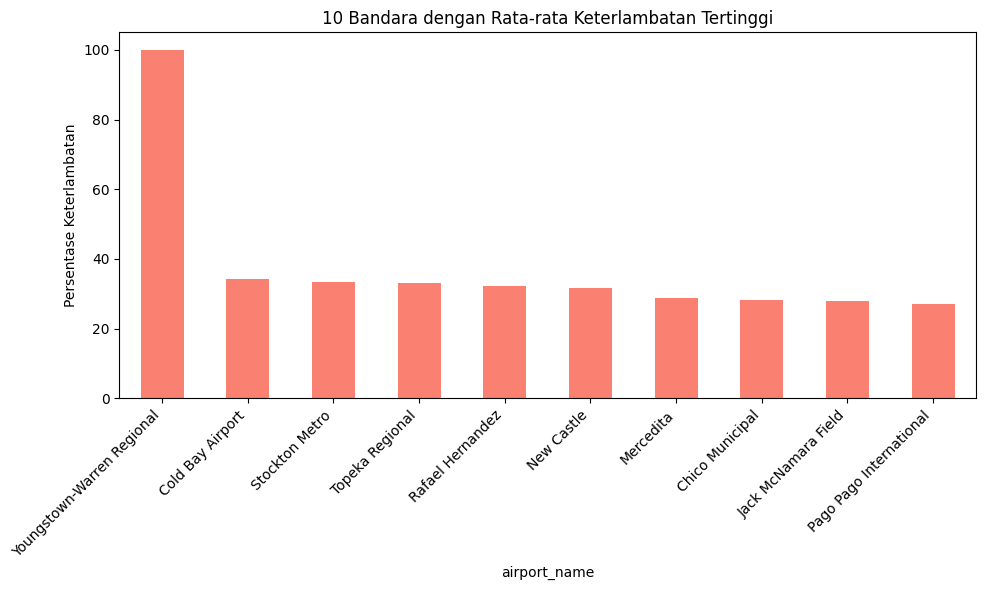

In [19]:
top_airports = airline_data.groupby('airport_name')['arr_del15_percentage'].mean().sort_values(ascending=False).head(10)

top_airports.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('10 Bandara dengan Rata-rata Keterlambatan Tertinggi')
plt.ylabel('Persentase Keterlambatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

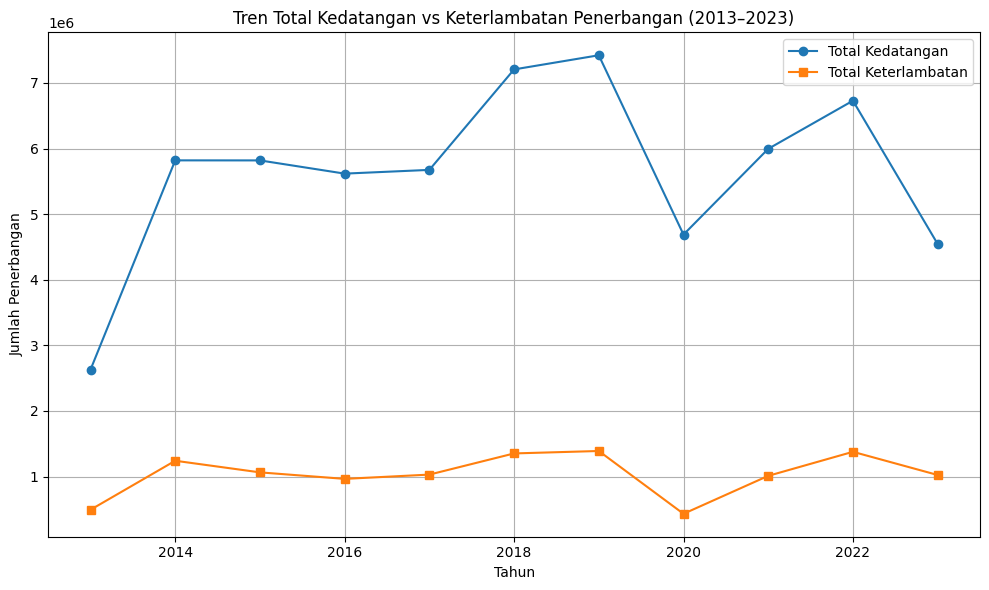

In [20]:
trend = airline_data.groupby('year')[['arr_flights', 'arr_del15']].sum()

plt.figure(figsize=(10, 6))
plt.plot(trend.index, trend['arr_flights'], label='Total Kedatangan', marker='o')
plt.plot(trend.index, trend['arr_del15'], label='Total Keterlambatan', marker='s')
plt.title('Tren Total Kedatangan vs Keterlambatan Penerbangan (2013–2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penerbangan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Hitung rata-rata keterlambatan per state
state_delay = airline_data.groupby('airport_state')['arr_del15_percentage'].mean().reset_index()

state_delay['airport_state_full'] = state_delay['airport_state'].map(state_abbrev_to_name)

state_delay.head(5)

,airport_state,arr_del15_percentage,airport_state_full
0,AK,15.624957,Alaska
1,AL,18.690375,Alabama
2,AR,18.203598,Arkansas
3,AZ,17.713353,Arizona
4,CA,18.483551,California


In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_delay['airport_state'],  # State abbreviations, e.g. 'NY', 'CA'
    z=state_delay['arr_del15_percentage'],  # Values to be color-coded
    locationmode='USA-states',  # Match state abbreviations
    colorscale='Blues',
    colorbar_title="Persentase Keterlambatan",
    text=state_delay['airport_state_full'],  # Hover text
))

fig.update_layout(
    title_text='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian (2013-2023)',
    geo_scope='usa',  # Limit map scope to USA
)

fig.show()

# fig = go.choropleth(state_delay,
#                     locations='airport_state',
#                     color='arr_del15_percentage',
#                     color_continuous_scale='Reds',
#                     scope='usa',
#                     labels={'arr_del15_percentage':'% Delay >15m'},
#                     title='Rata-rata Persentase Keterlambatan >15 Menit per Negara Bagian')